# **Mileage** **Prediction**

# Objective

The objective is to develop a predictive model that can accurately estimate a vehicle's miles per gallon (mpg) based on various features such as displacement, horsepower, weight, and acceleration. This project aims to assist in understanding the factors that influence fuel efficiency and to provide a tool for estimating a vehicle's mpg, which can be valuable for both consumers and the automotive industry.

# Data Source

https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv

# Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Import Data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Remove Missing Values

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

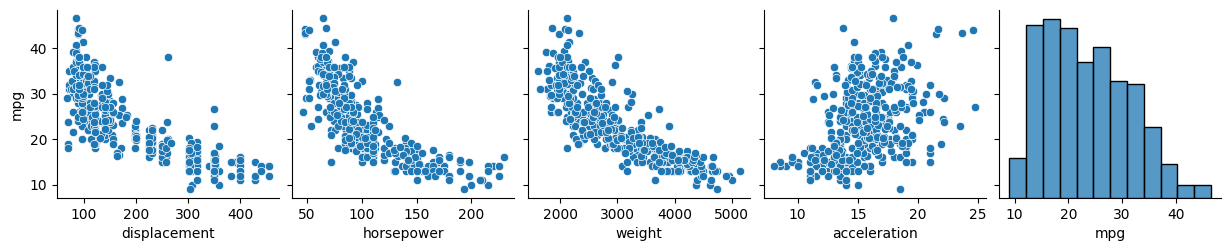

In [13]:
sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

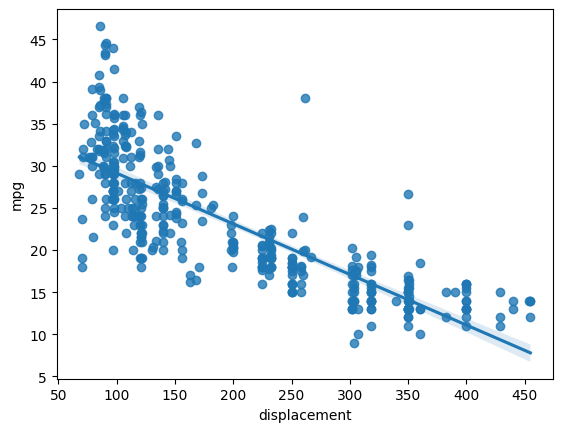

In [14]:
sns.regplot(x = 'displacement', y = 'mpg', data = df)

# Define Target Variable y and Feature X

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y = df['mpg']

In [17]:
y.shape

(392,)

In [18]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [19]:
x.shape

(392, 4)

# Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
x = ss.fit_transform(x)

In [23]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)

In [26]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [30]:
lr.intercept_

23.70577131254466

In [31]:
lr.coef_

array([-0.29596416, -1.00176401, -5.21847312,  0.64378464])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

# Predict Test Data

In [32]:
y_pred = lr.predict(xtest)

In [33]:
y_pred

array([27.07692437, 28.01178771, 26.31118704, 26.73751413, 27.58429218,
       29.79829817, 14.82132097, 13.77118948, 18.57999966, 29.38146118,
        9.70996989, 27.15965533, 22.88133379, 28.29007688, 29.75427335,
       28.66568783, 28.10023728, 25.45176296, 15.70189666, 16.07454519,
       31.16329424, 15.14948484, 33.26599604, 27.78188679, 29.28444517,
       18.46441496, 13.50838499, 26.27250572, 30.8017976 , 16.5680966 ,
       24.33515208, 26.25211527, 21.79659933, 28.59628852, 26.79601516,
       24.7943543 , 27.68549551, 25.58580917, 24.20957887, 27.17477976,
       33.30197592, 29.17642118, 16.01330185, 27.55495805, 15.82887935,
       22.92897976, 14.48179291, 25.28796836, 24.00070209, 27.84810984,
       20.26119595, 24.85449166, 26.7904256 , 14.11727932, 24.41375495,
       29.09351644,  9.09907502, 10.98731819, 33.8052527 , 20.45165726,
       25.13012616, 28.72970144, 17.23675244, 29.13178075, 27.55123865,
       19.46168475, 10.44122648, 20.75691329, 23.79661879, 32.60

# Model Accuracy

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [35]:
mean_absolute_error(ytest, y_pred)

3.302556754768126

In [36]:
mean_absolute_percentage_error(ytest, y_pred)

0.15428153690091215

In [37]:
r2_score(ytest, y_pred)

0.6807597741596627

# Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [40]:
x_train2 = poly.fit_transform(xtrain)

In [41]:
x_test2 = poly.fit_transform(xtest)

In [42]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [43]:
lr.intercept_

21.451644524817095

In [44]:
lr.coef_

array([-2.21002728, -5.48901287, -1.67207025, -0.82950395,  0.89469015,
       -0.3975589 ,  0.25850648,  1.3397447 , -1.06623277, -0.07001036])

In [45]:
y_pred_poly = lr.predict(x_test2)

# Model Accuracy

In [46]:
mean_absolute_error(ytest, y_pred_poly)

3.071698578330407

In [47]:
mean_absolute_percentage_error(ytest, y_pred_poly)

0.1339268374184791

In [48]:
r2_score(ytest, y_pred_poly)

0.669381692863386

# Explaination






This code represents a data analysis and modeling workflow using Python and several libraries, primarily focusing on predicting the miles per gallon (mpg) of a vehicle based on various features like displacement, horsepower, weight, and acceleration. Here's a brief explanation of each part of the code:

1. **Importing Libraries**: The code starts by importing essential libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib for data visualization, and Seaborn for creating plots.

2. **Importing Data**: The dataset is loaded from a URL using `pd.read_csv()`. This dataset contains information about various vehicles and their characteristics, with 'mpg' as the target variable.

3. **Data Exploration**:
   - `df.head()`: Displays the first few rows of the dataset.
   - `df.nunique()`: Shows the number of unique values in each column.
   - `df.info()`: Provides information about the dataset, including data types and missing values.
   - `df.describe()`: Generates statistical summaries of the numerical columns.
   - `df.corr()`: Computes the correlation matrix between numerical columns.

4. **Data Preprocessing**:
   - `df.dropna()`: Removes rows with missing values.
   - Standardizes the numerical features (`displacement`, `horsepower`, `weight`, and `acceleration`) using `StandardScaler` from scikit-learn.

5. **Train-Test Split**:
   - Splits the dataset into training and testing sets using `train_test_split` from scikit-learn. The training set contains 70% of the data.

6. **Linear Regression Model**:
   - Creates a linear regression model using `LinearRegression` from scikit-learn.
   - Fits the model to the training data.
   - Computes the coefficients and intercept of the linear regression model.

7. **Prediction**:
   - Predicts the 'mpg' values on the test set using the trained linear regression model.

8. **Model Evaluation**:
   - Evaluates the linear regression model using three metrics:
     - `mean_absolute_error`: Measures the average absolute difference between actual and predicted 'mpg' values.
     - `mean_absolute_percentage_error`: Measures the average absolute percentage difference.
     - `r2_score`: Calculates the coefficient of determination (R-squared) to assess the goodness of fit.

9. **Polynomial Regression**:
   - Applies polynomial regression by using `PolynomialFeatures` from scikit-learn to create higher-degree interaction terms in the features.
   - Fits a linear regression model to the transformed training data.
   - Computes the coefficients and intercept of the polynomial regression model.

10. **Model Evaluation (Polynomial Regression)**:
   - Evaluates the polynomial regression model using the same three metrics as the linear regression model.

Overall, this code demonstrates a typical machine learning workflow for predicting a target variable (mpg) from a set of features using both linear and polynomial regression models. It includes data exploration, preprocessing, model training, prediction, and evaluation steps to assess the model's performance.